In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [17]:
B = 0.7
sigma_c = 3
sigma_s = 6
size = 21

In [18]:
x = np.linspace(-size // 2, size // 2, size)
y = np.linspace(-size // 2, size // 2, size)
X, Y = np.meshgrid(x, y)

center = np.exp(-(X**2 + Y**2) / (2 * sigma_c**2))
surround = np.exp(-(X**2 + Y**2) / (2 * sigma_s**2))

on_center_rf = center - B * surround
off_center_rf = B * surround - center


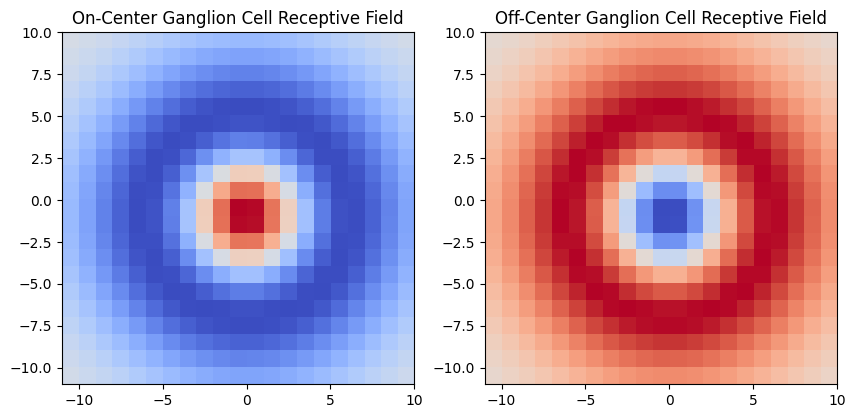

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(on_center_rf, cmap='coolwarm', extent=[-size//2, size//2, -size//2, size//2])
axes[0].set_title("On-Center Ganglion Cell Receptive Field")
axes[1].imshow(off_center_rf, cmap='coolwarm', extent=[-size//2, size//2, -size//2, size//2])
axes[1].set_title("Off-Center Ganglion Cell Receptive Field")
plt.show()


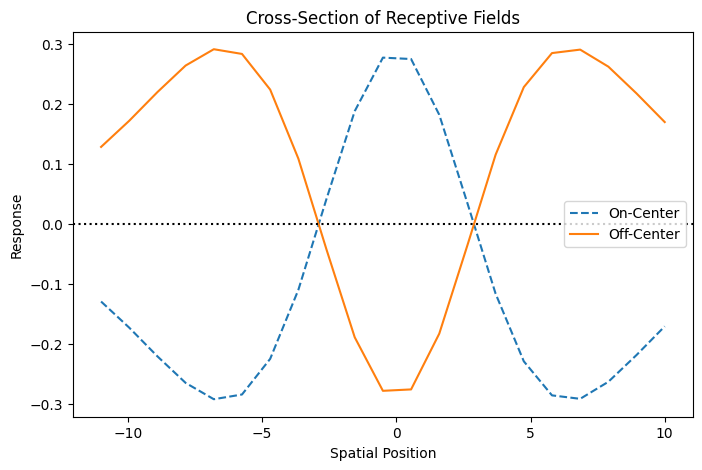

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(x, on_center_rf[size//2, :], label="On-Center", linestyle='dashed')
plt.plot(x, off_center_rf[size//2, :], label="Off-Center", linestyle='solid')
plt.axhline(0, color='black', linestyle='dotted')
plt.legend()
plt.title("Cross-Section of Receptive Fields")
plt.xlabel("Spatial Position")
plt.ylabel("Response")
plt.show()


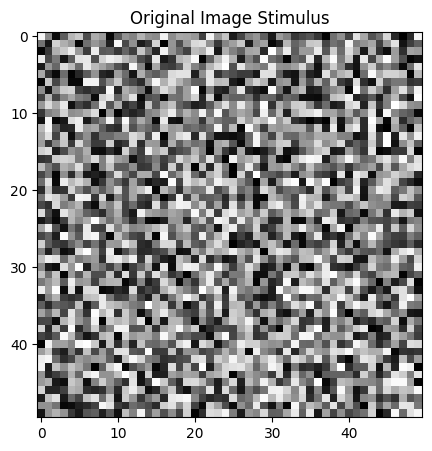

In [21]:
image_size = 50
image_stimulus = np.random.rand(image_size, image_size)

plt.figure(figsize=(5, 5))
plt.imshow(image_stimulus, cmap='gray')
plt.title("Original Image Stimulus")
plt.show()


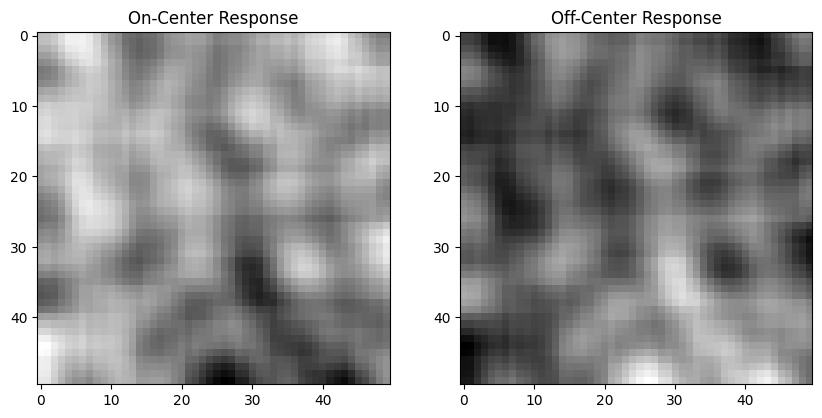

In [22]:
on_center_response = convolve2d(image_stimulus, on_center_rf, mode='same', boundary='symm')
off_center_response = convolve2d(image_stimulus, off_center_rf, mode='same', boundary='symm')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(on_center_response, cmap='gray')
axes[0].set_title("On-Center Response")
axes[1].imshow(off_center_response, cmap='gray')
axes[1].set_title("Off-Center Response")
plt.show()
